## 0.Initiation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from mdgo.core import MdRun
import MDAnalysis
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
%matplotlib notebook

In [3]:
"""
al_6_run = MdRun("/Users/th/Downloads/mof_project/mof_mn_al/al_0.6/mof_al_170pc_0.6.data",
                 "/Users/th/Downloads/mof_project/mof_mn_al/al_0.6/LiXWT_npt_nvt.dcd",
                 "/Users/th/Downloads/mof_project/mof_mn_al/al_0.6/LiXWT_npt_unwrapped_nvt.dcd",
                 500, 10, "mof al 6 run0", 
                 {"cation": "type 10", "anion": "same charge as index 113", "PC": "type 12", "center": "type 7"},
                 anion_charge = -1/4)
"""

mn_6_run = MdRun("/Users/th/Downloads/mof_project/mof_mn_al/mn_0.6/mof_mn_170pc_0.6.data",
                 "/Users/th/Downloads/mof_project/mof_mn_al/mn_0.6/LiXWT_npt_nvt.dcd",
                 "/Users/th/Downloads/mof_project/mof_mn_al/mn_0.6/LiXWT_npt_unwrapped_nvt.dcd",
                 500, 10, "mof mn 6 run0", 
                 {"cation": "type 10", "anion": "same charge as index 113", "PC": "type 12", "center": "type 7"},
                 anion_charge = -1/4, cond=None)

In [4]:
matrix1 = np.array([[-0.5, -sqrt(3)/2, 0],
                    [sqrt(3)/2, -0.5, 0],
                    [0, 0, 1]])
matrix2 = np.array([[-0.5, sqrt(3)/2, 0],
                    [-sqrt(3)/2, -0.5, 0],
                    [0, 0, 1]])
matrix3 = np.array([[-1, 0, 0],
                    [0, -1, 0],
                    [0, 0, -1]])
cartesian_by_ref = np.array([[2, 1, 1],
                             [0, 1, -1],
                             [1, -1, -1]])
sym = {"reflection": [np.array([1, -1, 1])],
       "rotation": [matrix1, matrix2], 
        "inversion": [matrix3]}

In [5]:
coords = mn_6_run.get_heat_map(1000, 5000, "center", 8.0, 8.0, bind_atom_type="same charge as index 110")
coords_full = mn_6_run.get_heat_map(1000, 5000, "center", 8.0, 8.0, 
                                    bind_atom_type="same charge as index 110", sym_dict=sym)

In [6]:
coords_random = mn_6_run.get_heat_map(1000, 5000, "center", 8.0, 8.0, bind_atom_type="same charge as index 110",
                                      cartesian_by_ref=cartesian_by_ref, sym_dict=sym, sample=100000)

<IPython.core.display.Javascript object>


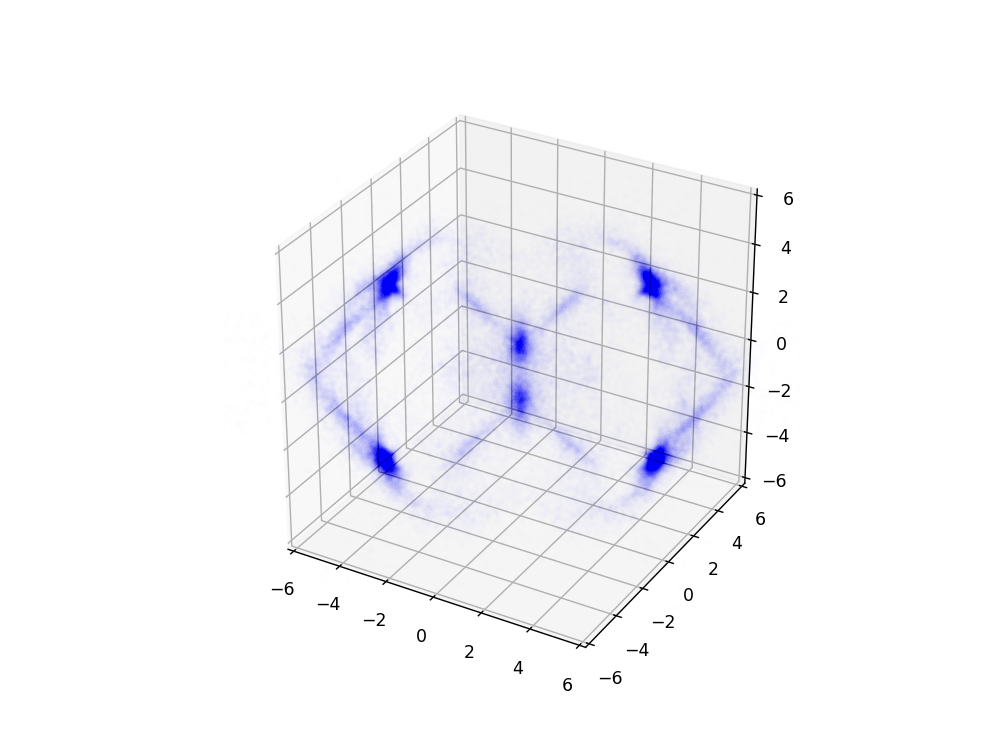

In [7]:
#import scipy as sp
#import scipy.stats
#from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(coords_full[::100, 0], coords_full[::100, 1], coords_full[::100, 2], c="b", s=10, linewidths=0, alpha = 0.002)
ax.scatter(coords_random[:, 0], coords_random[:, 1], coords_random[:, 2], c="b", s=10, linewidths=0, alpha = 0.002)
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_zlim(-6, 6)
ax.set_box_aspect((1, 1, 1))

In [8]:
from scipy.io import savemat
savemat("/Users/th/Downloads/density.mat", {'density': coords_random})

In [9]:
from mdgo.coordination import cluster_coordinates
cluster1 = cluster_coordinates(mn_6_run.wrapped_run, mn_6_run.select_dict, 1000, 2000, ["type 2", "type 3"],  6)
cluster2 = cluster_coordinates(mn_6_run.wrapped_run, mn_6_run.select_dict, 1000, 2000, ["type 1"],  6)

(type 2 or type 3) and (around 6 index 420)
(type 1) and (around 6 index 420)


<IPython.core.display.Javascript object>


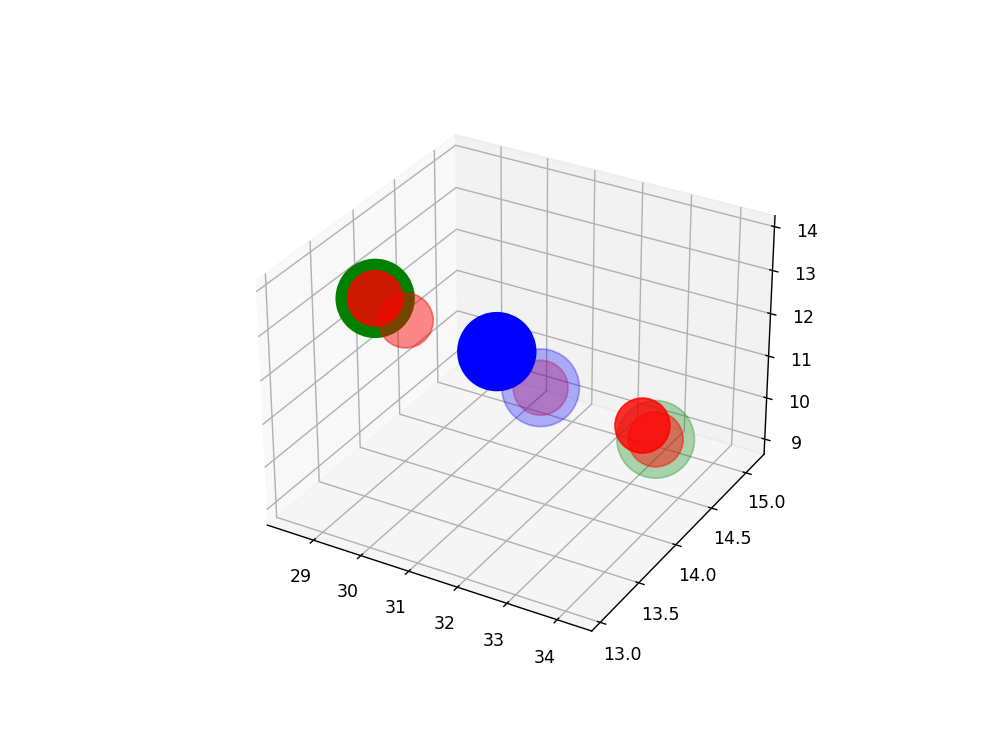

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster2[:, 0], cluster2[:, 1], cluster2[:, 2], c="r", s=1000)
ax.scatter(cluster2[:2, 0], cluster2[:2, 1], cluster2[:2, 2], c="b", s=2000)
ax.scatter(cluster2[2:4, 0], cluster2[2:4, 1], cluster2[2:4, 2], c="g", s=2000)

In [11]:
from mdgo.util import position_vec
vec1 = position_vec(cluster2[0], cluster2[1], mn_6_run.get_nvt_dimension())
vec2 = position_vec(cluster2[2], cluster2[3], mn_6_run.get_nvt_dimension())

In [12]:
cluster1_norm = cluster_coordinates(mn_6_run.wrapped_run, mn_6_run.select_dict, 1000, 2000,
                                    ["type 2", "type 3"],  6, basis_vectors=[vec1, vec2])
cluster2_norm = cluster_coordinates(mn_6_run.wrapped_run, mn_6_run.select_dict, 1000, 2000,
                                    ["type 1"],  6, basis_vectors=[vec1, vec2])

(type 2 or type 3) and (around 6 index 420)
(type 1) and (around 6 index 420)


<IPython.core.display.Javascript object>


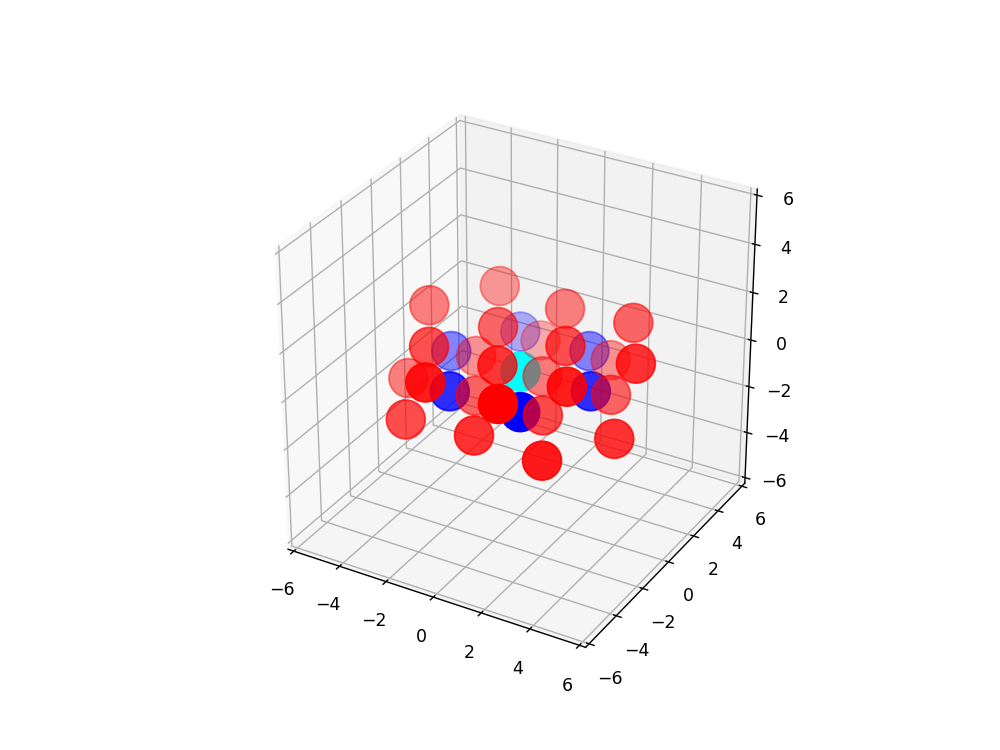

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster1_norm[:, 0], cluster1_norm[:, 1], cluster1_norm[:, 2], c="r", s=500)
ax.scatter(cluster2_norm[:, 0], cluster2_norm[:, 1], cluster2_norm[:, 2], c="b", s=500)
ax.scatter([0], [0], [0], c="cyan", s=500)
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_zlim(-6, 6)
ax.set_box_aspect((1, 1, 1))

In [14]:
savemat("/Users/th/Downloads/cluster.mat", {'o': cluster1_norm, 'mo': cluster2_norm})